Temperatura inicial do dique: 1100 °C
Temperatura da rocha encaixante: 40 °C

Plote curvas da temperatura de pontos que estão a 10, 20, 50 e 100 m de uma das paredes do dique em função do tempo.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

<>:40: SyntaxWarning: invalid escape sequence '\c'
<>:40: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_25767/1476697908.py:40: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("Temperature [$\circ$C]")


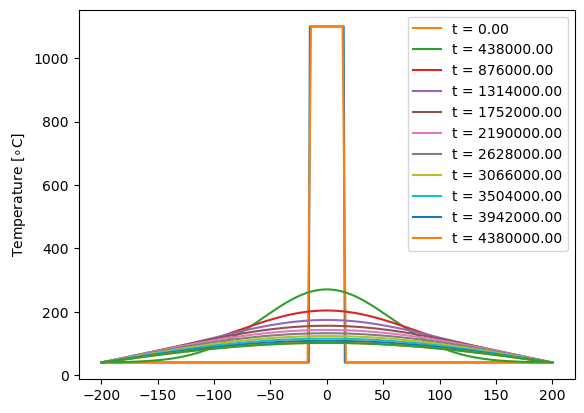

In [32]:
dx = 1
x = np.arange(-200,200 + dx, dx)
INITIAL_HOST_ROCK_TEMPERATURE = 40.0 # [°C]
INITIAL_DYKE_TEMPERATURE = 1100.0 # [°C]
temperature = np.zeros(np.shape(x)) + INITIAL_HOST_ROCK_TEMPERATURE
temperature[(x>=-15)&(x<=15)] = INITIAL_DYKE_TEMPERATURE
kappa = 1e-6 # [m²/s*°C]
t = 0

hours = 3600.0

days = hours*24
years = 365*days
t_max = 500*years
dt = 0.01*years#0.1*(dx**2)/(kappa*2)

plt.plot(x, temperature)

t_aux = 0

temperature_10_meters = list()
temperature_20_meters = list()
temperature_50_meters = list()
temperature_100_meters = list()
time = np.arange(0, t_max + dt, dt)
while t<=t_max:
    temperature_central = temperature[1:-1]
    temperature_left = temperature[:-2]
    temperature_right = temperature[2:]
    temperature[1:-1] += kappa*dt*(temperature_right - 2*temperature_central + temperature_left)/dx**2
    temperature_10_meters.append(temperature[(x == -25)])
    temperature_20_meters.append(temperature[(x == -35)])
    temperature_50_meters.append(temperature[(x == -65)])
    temperature_100_meters.append(temperature[(x == -115)])
    if t>=t_aux:
        plt.plot(x, temperature, label="t = %.2f"%(t/3600))
        t_aux += t_max/10
    t+=dt
plt.plot(x, temperature)
plt.ylabel("Temperature [$\circ$C]")
plt.legend()


<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_25767/1758889902.py:6: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("Temperatura [$^\circ$C]")


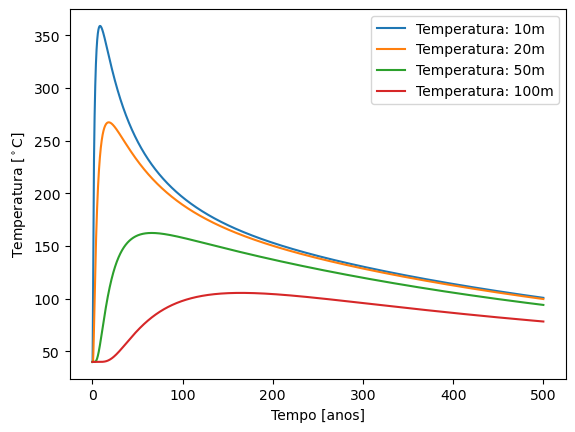

In [33]:
plt.plot(time/years,temperature_10_meters, label= "Temperatura: 10m")
plt.plot(time/years,temperature_20_meters, label= "Temperatura: 20m")
plt.plot(time/years,temperature_50_meters, label= "Temperatura: 50m")
plt.plot(time/years,temperature_100_meters, label= "Temperatura: 100m")
plt.xlabel("Tempo [anos]")
plt.ylabel("Temperatura [$^\circ$C]")
plt.legend()